<a href="https://colab.research.google.com/github/jahnvisikligar/Online_Retail_Analysis/blob/main/Online_retail_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://www.kaggle.com/jahnvisikligar/online-retail-js?scriptVersionId=90326309" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [104]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [105]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline
from sklearn.model_selection import train_test_split
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [106]:
#reading CSV file
df = pd.read_csv("/content/online_retail_II.csv")

> # **Part 1: Exploratory Data Analysis**





> In this step we doing the basic exploration of data and cleaning of it as well.



In [107]:
#computing shape
df.shape

(1067371, 8)

In [108]:
#checking for columns in CSV
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [109]:
#checking for head of CSV
df.head()

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

           InvoiceDate  Price  Customer ID         Country  
0  2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1  2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2  2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3  2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4  2009-12-01 07:45:00   1.25      13085.0  United Kingdom

In [110]:
#checking for tail of CSV
df.tail()

Invoice StockCode                      Description  Quantity  \
1067366  581587     22899     CHILDREN'S APRON DOLLY GIRL          6   
1067367  581587     23254    CHILDRENS CUTLERY DOLLY GIRL          4   
1067368  581587     23255  CHILDRENS CUTLERY CIRCUS PARADE         4   
1067369  581587     22138    BAKING SET 9 PIECE RETROSPOT          3   
1067370  581587      POST                          POSTAGE         1   

                 InvoiceDate  Price  Customer ID Country  
1067366  2011-12-09 12:50:00   2.10      12680.0  France  
1067367  2011-12-09 12:50:00   4.15      12680.0  France  
1067368  2011-12-09 12:50:00   4.15      12680.0  France  
1067369  2011-12-09 12:50:00   4.95      12680.0  France  
1067370  2011-12-09 12:50:00  18.00      12680.0  France

In [111]:
#sample of 5
df.sample(5)

Invoice StockCode                      Description  Quantity  \
574152   540472     84692      BOX OF 24 COCKTAIL PARASOLS        25   
1025970  578783     22619        SET OF 6 SOLDIER SKITTLES         1   
758340   557350     22697  GREEN REGENCY TEACUP AND SAUCER         6   
888208   568517     22197                   POPCORN HOLDER         4   
353658   523766     22138    BAKING SET 9 PIECE RETROSPOT          3   

                 InvoiceDate  Price  Customer ID         Country  
574152   2011-01-07 14:22:00   0.42      18179.0  United Kingdom  
1025970  2011-11-25 11:58:00   3.75      12748.0  United Kingdom  
758340   2011-06-20 10:41:00   2.95      16670.0  United Kingdom  
888208   2011-09-27 12:52:00   0.85      14456.0  United Kingdom  
353658   2010-09-24 10:29:00   4.95      14875.0  United Kingdom

In [112]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [113]:
#exploring the unique values of each attribute
print("Number of transactions: ", df['Invoice'].nunique())
print("Number of products: ",df['StockCode'].nunique())
print("Number of customers:", df['Customer ID'].nunique() )
print("Percentage of customers NA: ", round(df['Customer ID'].isnull().sum() * 100 / len(df),2),"%" )
print('Number of countries: ',df['Country'].nunique())

Number of transactions:  53628
Number of products:  5305
Number of customers: 5942
Percentage of customers NA:  22.77 %
Number of countries:  43


In [114]:
#removing duplicates
print("Number of transactions before duplicates removal : %d " % df.shape[0])
# Dropping the duplicated transactions
df = df.drop(index=df[df.duplicated()].index)
print("Number of transactions after duplicates removal  : %d " % df.shape[0])

Number of transactions before duplicates removal : 1067371 
Number of transactions after duplicates removal  : 1033036 


In [115]:
#dropping quantities with NA values
df.dropna(inplace=True)
#df.drop(index = df[df['Quantity'] <= 0].index)
df = df.reset_index(drop=True)
df.dropna()

Invoice StockCode                          Description  Quantity  \
0       489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1       489434    79323P                   PINK CHERRY LIGHTS        12   
2       489434    79323W                  WHITE CHERRY LIGHTS        12   
3       489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4       489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...        ...       ...                                  ...       ...   
797880  581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
797881  581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
797882  581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
797883  581587     22138        BAKING SET 9 PIECE RETROSPOT          3   
797884  581587      POST                              POSTAGE         1   

                InvoiceDate  Price  Customer ID         Country  
0       2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1       2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2       2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3       2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4       2009-12-01 07:45:00   1.25      13085.0  United Kingdom  
...                     ...    ...          ...             ...  
797880  2011-12-09 12:50:00   2.10      12680.0          France  
797881  2011-12-09 12:50:00   4.15      12680.0          France  
797882  2011-12-09 12:50:00   4.15      12680.0          France  
797883  2011-12-09 12:50:00   4.95      12680.0          France  
797884  2011-12-09 12:50:00  18.00      12680.0          France  

[797885 rows x 8 columns]

>  **Verification of dimensions of data after removing NA values**

In [116]:
df.shape

(797885, 8)

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 797885 entries, 0 to 797884
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      797885 non-null  object 
 1   StockCode    797885 non-null  object 
 2   Description  797885 non-null  object 
 3   Quantity     797885 non-null  int64  
 4   InvoiceDate  797885 non-null  object 
 5   Price        797885 non-null  float64
 6   Customer ID  797885 non-null  float64
 7   Country      797885 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 48.7+ MB


In [118]:
df["Country"].value_counts()

United Kingdom          716115
Germany                  17339
EIRE                     16014
France                   13897
Netherlands               5137
Spain                     3754
Belgium                   3110
Switzerland               3058
Portugal                  2414
Australia                 1890
Channel Islands           1646
Italy                     1507
Sweden                    1343
Norway                    1308
Cyprus                    1157
Finland                   1049
Austria                    938
Denmark                    797
Greece                     663
Japan                      565
USA                        535
Poland                     527
Unspecified                521
United Arab Emirates       386
Singapore                  346
Israel                     321
Malta                      299
Canada                     228
Iceland                    222
Lithuania                  154
RSA                        123
Brazil                      94
Thailand

In [119]:
#exploring the unique values of each attribute
print("Number of transactions: ", df['Invoice'].nunique())
print("Number of products: ",df['StockCode'].nunique())
print("Number of customers:", df['Customer ID'].nunique() )
print("Percentage of customers NA: ", round(df['Customer ID'].isnull().sum() * 100 / len(df),2),"%" )
print('Number of countries: ',df['Country'].nunique())

Number of transactions:  44876
Number of products:  4646
Number of customers: 5942
Percentage of customers NA:  0.0 %
Number of countries:  41


In [120]:
df.describe()

Quantity          Price    Customer ID
count  797885.000000  797885.000000  797885.000000
mean       12.602980       3.702732   15313.062777
std       191.670371      71.392549    1696.466663
min    -80995.000000       0.000000   12346.000000
25%         2.000000       1.250000   13964.000000
50%         5.000000       1.950000   15228.000000
75%        12.000000       3.750000   16788.000000
max     80995.000000   38970.000000   18287.000000

In [121]:
df.corr()

Quantity     Price  Customer ID
Quantity     1.000000 -0.001918    -0.005171
Price       -0.001918  1.000000    -0.003789
Customer ID -0.005171 -0.003789     1.000000

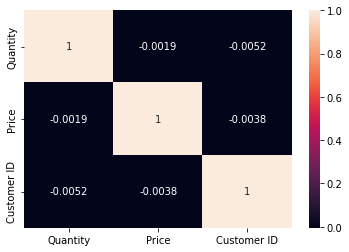

In [122]:
sns.heatmap(df.corr(), annot=True)

> ****Checking for cancelled orders****

In [123]:
#get cancelled transactions
cancelled_orders = df[df['Invoice'].astype(str).str.contains('C')]
cancelled_orders

Invoice StockCode                       Description  Quantity  \
178     C489449     22087          PAPER BUNTING WHITE LACE       -12   
179     C489449    85206A      CREAM FELT EASTER EGG BASKET        -6   
180     C489449     21895     POTTING SHED SOW 'N' GROW SET        -4   
181     C489449     21896                POTTING SHED TWINE        -6   
182     C489449     22083        PAPER CHAIN KIT RETRO SPOT       -12   
...         ...       ...                               ...       ...   
797439  C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
797523  C581499         M                            Manual        -1   
797690  C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
797691  C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
797692  C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

                InvoiceDate   Price  Customer ID         Country  
178     2009-12-01 10:33:00    2.95      16321.0       Australia  
179     2009-12-01 10:33:00    1.65      16321.0       Australia  
180     2009-12-01 10:33:00    4.25      16321.0       Australia  
181     2009-12-01 10:33:00    2.10      16321.0       Australia  
182     2009-12-01 10:33:00    2.95      16321.0       Australia  
...                     ...     ...          ...             ...  
797439  2011-12-09 09:57:00    0.83      14397.0  United Kingdom  
797523  2011-12-09 10:28:00  224.69      15498.0  United Kingdom  
797690  2011-12-09 11:57:00   10.95      15311.0  United Kingdom  
797691  2011-12-09 11:58:00    1.25      17315.0  United Kingdom  
797692  2011-12-09 11:58:00    1.25      17315.0  United Kingdom  

[18390 rows x 8 columns]

In [124]:
#computing the number of cancelled transactions
print("We have",len(cancelled_orders),"cancelled orders.")
#percentage of cancelled orders in total orders
total_orders = df['Invoice'].nunique()
cancelled_number = len(cancelled_orders)
print('Percentage of orders cancelled: {}/{} ({:.2f}%) '.format(cancelled_number, total_orders, cancelled_number/total_orders*100))

We have 18390 cancelled orders.
Percentage of orders cancelled: 18390/44876 (40.98%) 


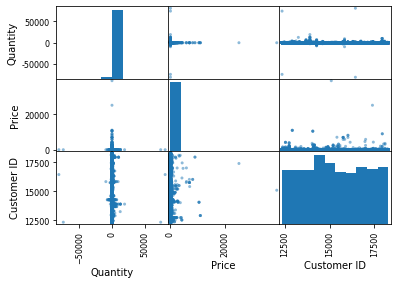

In [125]:
from pandas.plotting import scatter_matrix
_ = scatter_matrix(df)

> # **Part 2: Sales per country**

> ****Following points are covered:****
> * Total sales for product lines
> * Visual representation of Total sales of products Countrywise
> * Visual representation of Quantity of products sold in each Country**


In [126]:
#computing sales of each entry in data
#adding new column of Total sales in the dataframe
#checking for addition of new column in the dataframe
#the total sales occured on each invoice has been calculated as follows: total sales = quantity x price
df['Total_sales'] = df['Quantity'] * df['Price']
df.head() 

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

           InvoiceDate  Price  Customer ID         Country  Total_sales  
0  2009-12-01 07:45:00   6.95      13085.0  United Kingdom         83.4  
1  2009-12-01 07:45:00   6.75      13085.0  United Kingdom         81.0  
2  2009-12-01 07:45:00   6.75      13085.0  United Kingdom         81.0  
3  2009-12-01 07:45:00   2.10      13085.0  United Kingdom        100.8  
4  2009-12-01 07:45:00   1.25      13085.0  United Kingdom         30.0

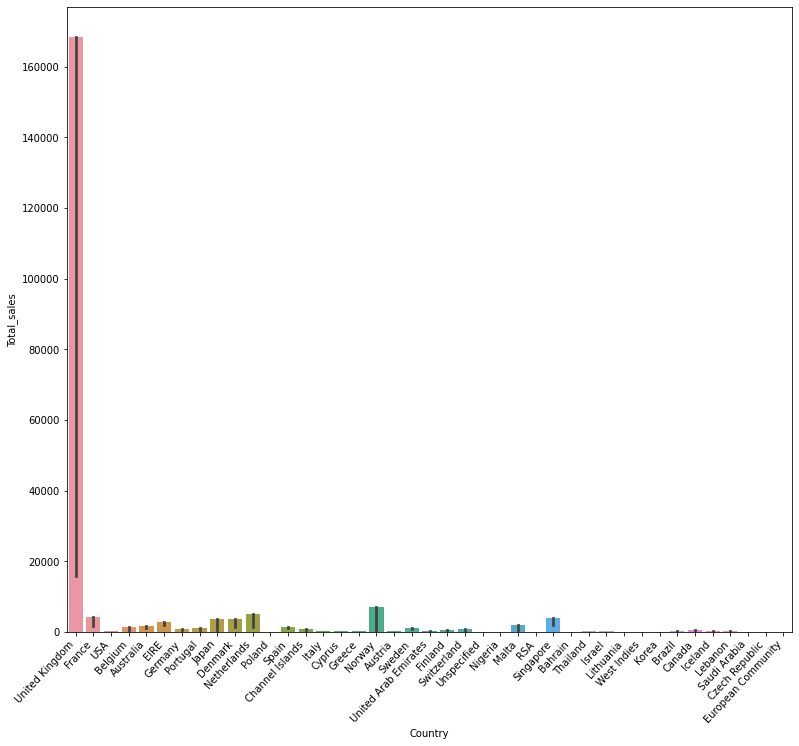

In [127]:
#bar graph to visualize the total sales occured per country

fig, ax = plt.subplots()
fig.set_size_inches(13, 11.5)
ax=sns.barplot(x='Country', y='Total_sales',data=df,estimator=max,ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=47, ha="right")
plt.show()

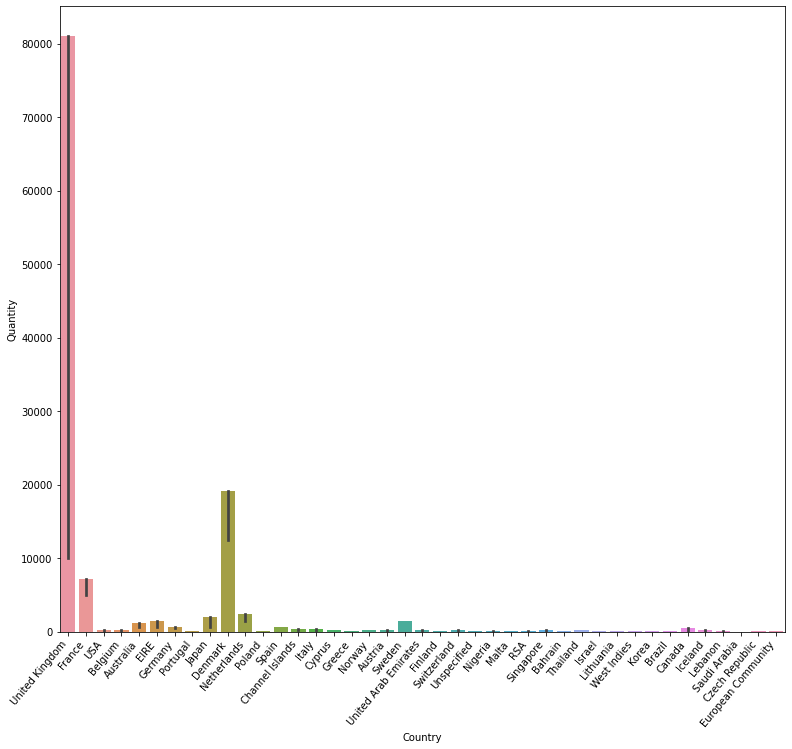

In [128]:
#bar graph to visualize the Quantity sold per Country
fig, ax = plt.subplots()
fig.set_size_inches(13, 11.5)
ax=sns.barplot(x='Country', y='Quantity',data=df,estimator=max,ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
plt.show()

> # **Part 3: Case study on UK**

> ****Further opportunities of target market:****
> * As it can be seen from the bar graphs that UK has had maximum Total sales and Quantity of products sold. 
> * It can be concluded that major sale market is UK. 
> * Further exploration of data for UK region can be done to analyse the most bought product in UK. 
> * Eventually, this answers our first business question - Future opportunities in a particular market.

In [129]:
#checking of unique values of Customers for UK 
df[df['Country']=='United Kingdom']['Customer ID'].nunique()

5410

In [130]:
sales_uk = df[df['Country']=='United Kingdom']
sales_uk.describe()

Quantity          Price    Customer ID    Total_sales
count  716115.000000  716115.000000  716115.000000  716115.000000
mean       11.442740       3.480462   15545.327850      18.827290
std       193.223234      70.893157    1592.771841     328.669454
min    -80995.000000       0.000000   12346.000000 -168469.600000
25%         2.000000       1.250000   14191.000000       4.130000
50%         4.000000       1.950000   15544.000000      10.200000
75%        12.000000       3.750000   16931.000000      17.700000
max     80995.000000   38970.000000   18287.000000  168469.600000

In [131]:
print("Number of transactions: ", sales_uk['Invoice'].nunique())
print("Number of products bought: ",sales_uk['StockCode'].nunique())
print("Number of customers:", sales_uk['Customer ID'].nunique() )
print("Percentage of customers NA: ", round(sales_uk['Customer ID'].isnull().sum() * 100 / len(sales_uk),2),"%" )
print('Number of countries: ',sales_uk['Country'].nunique())

Number of transactions:  40505
Number of products bought:  4631
Number of customers: 5410
Percentage of customers NA:  0.0 %
Number of countries:  1


In [132]:
#checking for most bought product in UK
groupedProduct = sales_uk.groupby('StockCode',as_index= False)['Quantity'].sum().sort_values(by='Quantity', ascending=False)
groupedProduct.head(10)

StockCode  Quantity
3413     84077     95056
4058    85099B     83115
4080    85123A     80937
3820     84879     72098
1405     22197     70235
108      17003     69011
600      21212     65639
1218     21977     44821
3939     84991     39866
16       15036     35613



>**Apriopri Algorithm for UK**



In [133]:
# Stripping extra spaces in the description
df['Description'] = df['Description'].str.strip()

# Dropping the rows without any invoice number
df.dropna(axis = 0, subset =['Invoice'], inplace = True)
df['Invoice'] = df['Invoice'].astype('str')

# Dropping all transactions which were done on credit
df = df[~df['Invoice'].str.contains('C')]

In [134]:
# Transactions done in France
#basket_France = (df[df['Country'] =="France"]
#          .groupby(['Invoice', 'Description'])['Quantity']
#          .sum().unstack().reset_index().fillna(0)
#          .set_index('Invoice'))
  
# Transactions done in the United Kingdom
basket_UK = (df[df['Country'] =="United Kingdom"]
          .groupby(['Invoice', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('Invoice'))
  

In [135]:
# Defining the hot encoding function to make the data suitable 
# for the concerned libraries
def hot_encode(x):
    if(x<= 0):
        return 0
    if(x>= 1):
        return 1
  
# Encoding the datasets
#basket_encoded = basket_France.applymap(hot_encode)
#basket_France = basket_encoded
  
basket_encoded = basket_UK.applymap(hot_encode)
basket_UK = basket_encoded
  

In [136]:
# Building the model
#frq_items = apriori(basket_France, min_support = 0.05, use_colnames = True)

# Collecting the inferred rules in a dataframe
#rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
#rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
#print(rules.head())


In [137]:
frq_items = apriori(basket_UK, min_support = 0.01, use_colnames = True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
print(rules.head())


                                           antecedents  \
295                     (POPPY'S PLAYHOUSE LIVINGROOM)   
342  (ROSES REGENCY TEACUP AND SAUCER, PINK REGENCY...   
293                        (POPPY'S PLAYHOUSE BEDROOM)   
344  (PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...   
350  (REGENCY CAKESTAND 3 TIER, GREEN REGENCY TEACU...   

                           consequents  antecedent support  \
295        (POPPY'S PLAYHOUSE KITCHEN)            0.011715   
342  (GREEN REGENCY TEACUP AND SAUCER)            0.015710   
293        (POPPY'S PLAYHOUSE KITCHEN)            0.014070   
344  (ROSES REGENCY TEACUP AND SAUCER)            0.016395   
350  (ROSES REGENCY TEACUP AND SAUCER)            0.013385   

     consequent support   support  confidence       lift  leverage  conviction  
295            0.015829  0.010463    0.893130  56.423599  0.010278    9.209029  
342            0.024683  0.013981    0.889943  36.055592  0.013593    8.861936  
293            0.015829  0.012013  

# **Part 4: Customer Segmentation using RFM**

In [148]:
#We change the data type of the order date
df [ 'InvoiceDate' ] = pd.to_datetime ( df['InvoiceDate'])
#We set today/analysis date as a variable
today = dt.datetime (2012,1,1)
print ( today )

2012-01-01 00:00:00


In [149]:
#We find Recency and Monetary values.
data_x = df.groupby ('Customer ID').agg({'Total_sales': lambda x: x. sum (),
                                        'InvoiceDate': lambda x:( today - x. max ()).days})
#Data is based on StockCode, we make InvoiceNo unique.
data_y = df.groupby(['Customer ID','Invoice']).agg ({'Total_sales': lambda x: x.sum()})

#When we count it, InvoiceNo is unique.
data_z = data_y.groupby ('Customer ID').agg ({'Total_sales': lambda x:len(x)})

#We reach the #RFM table.
rfm_table= pd.merge(data_x,data_z,on='Customer ID')

# We set the column names
rfm_table. rename(columns= {'InvoiceDate' : 'Recency' ,
                          'Total_sales_y' : 'Frequency' ,
                          'Total_sales_x' : 'Monetary'} ,inplace= True )

In [156]:
#Frequency find
def RScore(x,p,d ): 
    if x <= d [p][0.20]:
        return 0 
    elif x <= d [p][0.40]:
        return 1 
    elif x <= d [p][0.60]:
        return 2 
    elif x <= d [p][0.80]:
        return 3 
    else:
        return 4 
quantiles = rfm_table.quantile(q= [0.20,0.40,0.60,0.80])
quantiles = quantiles.to_dict()
rfm_table['Freq_Tile'] = rfm_table['Frequency'].apply(RScore, args= ('Frequency',quantiles,))

#Recency find
rfm_table = rfm_table.sort_values('Recency' ,ascending= True)
rfm_table ['Rec_Tile'] = pd.qcut(rfm_table['Recency'], 5 ,labels= False)

#Monetary find
rfm_table.sort_values('Monetary',ascending=False)
rfm_table['Mone_Tile'] = pd.qcut(rfm_table['Monetary'] , 5 ,labels= False)

# If we do not want the 'zero' value to be included, we increase the values ​​we find by 1
rfm_table['Rec_Tile'] = rfm_table ['Rec_Tile']+1
rfm_table['Freq_Tile'] = rfm_table ['Freq_Tile']+1
rfm_table['Mone_Tile'] = rfm_table ['Mone_Tile']+1

# We combine the values ​​we find and get a single score
rfm_table['RFM Score'] = rfm_table['Rec_Tile'].map(str) + rfm_table['Freq_Tile'].map(str) + rfm_table['Mone_Tile'].map(str)
rfm_table.head()

Monetary  Recency  Frequency  Freq_Tile  Rec_Tile  Mone_Tile  \
Customer ID                                                                 
12662.0       6726.54       22         20          5         1          5   
12518.0       2056.89       22          5          4         1          4   
13426.0       8167.38       22         22          5         1          5   
17490.0       2750.50       22          9          5         1          4   
16558.0      13304.11       22         38          5         1          5   

            RFM Score  
Customer ID            
12662.0           155  
12518.0           144  
13426.0           155  
17490.0           154  
16558.0           155

In [151]:
#We examine the contents of the values.
rfm_table.groupby('RFM Score').agg({
'Recency':['mean','min','max','count'],
'Frequency':['mean','min','max','count'],
'Monetary':['mean','min','max','count']}).round(1).head() 

Recency               Frequency               Monetary          \
             mean min max count      mean min max count     mean     min   
RFM Score                                                                  
111          33.5  23  41    42       1.0   1   1    42    165.9     0.0   
112          32.7  23  41    30       1.0   1   1    30    374.7   285.6   
113          31.4  22  40     5       1.0   1   1     5    887.7   681.0   
115          24.0  24  24     1       1.0   1   1     1   3861.0  3861.0   
121          31.0  23  41    22       2.0   2   2    22    208.3    77.4   

                         
              max count  
RFM Score                
111         280.1    42  
112         546.0    30  
113        1162.6     5  
115        3861.0     1  
121         284.5    22

# **Report and Analysis**



The project implementation has been divided into 4 parts as follows:

1.   *Exploratory Data Analysis(EDA)*
2.   *Sales per country*
1.   *Case study on UK*
2.   *Customer Segmentation using RFM*

They have been discussed in detail as shown below.

**Part 1:**

For the initial step we perform Exploratory Data Analysis(EDA). The EDA is beneficial in understanding the data, discovering patterns, spotting anomalies or null values in the dataset. Following steps have been executed:

*   Checking the shape, columns and top 5 head, tail and sample values of each column from the dataset.
*   In the next step, we checked if the dataset contained null values and duplicate values or not. It was observed that 'Description' and 'CustomerID' had some null values.
*   Then I checked for duplicate values and removed them using '.dropna()' function and reset the indexing of dataset.
*   Later on to varify if the dataset was free of all duplicate and values. I again used basic EDA menthods and confirmed the data was free of discrepancies.
*   To better take insight into the data set, I did correlation for 'Quantity', 'Price' and 'CustomerID'. From the table it could be understood that 'Quantity' had negative correlation with both 'Price' and 'CustomerID' and similar case was observed individually with each of them.











**Part 2:**

For part 2, we will be visualizing the data to understand the target market for future sales. To understand sales, a new column - 'Total_sales' has been created which is computed with following formula:
    
    Total sales = Price x Quantity

The graphs visualized are as below:
1.   *Total sales v/s Country*

From here, it can be deciphered that United Kingdom(UK) has the maximum sales among the 41 countries. Next being followed by Norway and Poland.
2.   *Quantity v/s Country*

From this graph, we could understand that again United Kingdom(UK) had been the country with most quantity of products sold. That was followed by Denmark and France.





**Part 3:**

Since it can be visualized from the above graphs that United Kingdom(UK) has been the country with most sales and products sold. This led me on to performing a case study on the data for the UK region. As it could be the future target region to increase sales and products sold. 

Here, we store the data related to UK region in a new dataframe for it to accessed frequently. We compute that UK has solely contributed to nearly 716115 counts of the 797885 values in the data.

Following are unique statistical values observed for UK region:
*   Number of transactions: 40505
*   Number of products bought: 4631
*   Number of customers: 5410

In the next step, check for the top10 most bought products. This would let the company know which products are being sold the most by analyzing from the 'StockCode' and 'Quantity'. Thus helping in replenshing and stocking up the inventory for those particular products on timely basis in UK.

Next we use Apriopri Algorithm to gain insight into the structed relationships of different itemsets of the region. Before we begin with building the model, we do 'one-hot' encoding of the grouped data of UK region as it makes it more suitable and accessible for implementation. Taking forward, we build the Apriopri model to check for most frequent itemsets and set minimum support count as 0.01. 

When the rules for British transactions are examined more closely, it is discovered that the British buy different coloured tea-plates together. One reason for this could be that the British love tea and frequently collect different coloured tea-plates for different occasions.












**Part 4:**

In this part we implement Customer Segementation using RFM(REcency, Frequency,Monetary). It is performed by combining these 3 metrics after they have been calculated. This is helpful in order to analyze the current status of sustomers and segmenting them according to their scores obtained. 



> Recency: 

It is the information of how long the customer has been receivng the service from a company and its term of membership. Computed as follows:

    Last subscription date/ last order date from today

> Frequency:

This metric is often helpful in letting a company/organization know for how often the purchases are made by a customer. It results as mentioned below:

    Order number/order code

> Monetary

This metric tells about the sum of customer's expenses. It is beneficial in letting an organization know the revenue collected after the sevices once receives from it. It can be calculated by summing up the expenses made by a customer thorught their life.

Following interepretation can be made from the above RFM implementation. They have been discussed below: Taking an  example, let us interpret segment 111:

* This segment has 42 people, on average, their last purchase was nearly 33 days ago
* Their shopping frequency is 1, so they have 1 purchases.
* A total of approximately $165.9 were spent.